# Exploratory Data Analysis (EDA) - Alternative Approach
This notebook provides a unique approach to exploratory data analysis (EDA) on a dataset. The steps include data loading, cleaning, visualization, and preliminary analysis, using different techniques compared to the previous example.


In [4]:
pip install pandas numpy matplotlib seaborn scipy


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.6 MB 9.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.6 MB 8.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.6 MB 8.0 MB/s eta 0:00:01
   ------------------------ --------------- 7.1/11.6 MB 7.9 MB/s eta 0:00:01
   ----------------------------- ---------- 8.7/11.6 MB 7.8 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.6 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 7.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 6.7 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.8 MB 7.7 MB/s eta 0:00:01
   ------------------------- ----------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Set visualization style
plt.style.use('ggplot')

# Set random seed for reproducibility
np.random.seed(101)


Matplotlib is building the font cache; this may take a moment.


In [8]:
pip install openpyxl



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)


In [9]:
##reading the data 
df = pd.read_excel(r"C:\Users\acer\Downloads\GPVS-Faults-Detection.xlsx")

In [10]:
## printing first 5 rows
df.head(5)

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective/Non Defective
0,0.463482,1.378387,101.818848,142.675781,-0.477540,0.335693,0.108271,152.548981,-105.862122,-44.271952,0.476660,50.028196,155.413550,50.000403,0
1,9.251388,1.510834,101.196289,145.898438,0.321410,-0.530396,0.141841,-98.677673,155.104523,-51.046549,0.522298,50.280303,155.202019,49.997730,0
2,9.574456,1.574219,101.110840,142.675781,0.455688,-0.248413,-0.254277,-154.369202,64.877014,88.869375,0.495468,49.702755,154.748381,49.997643,0
3,2.677661,1.504211,100.878906,143.554688,0.200561,0.241699,-0.495977,-67.806244,-82.078705,157.370758,0.490341,50.057212,155.559231,50.005320,0
4,12.472965,1.507996,100.085449,143.261719,0.495971,-0.375977,-0.113286,-144.605103,122.846832,22.457428,0.528099,49.910095,155.204190,50.004243,0


In [11]:
# Generate a synthetic dataset for demonstration
data = {
    'Age': np.random.normal(loc=35, scale=10, size=100),
    'Income': np.random.uniform(25000, 100000, size=100),
    'Education_Level': np.random.choice(['Undergraduate', 'Graduate', 'Postgraduate'], size=100),
    'Work_Experience': np.random.poisson(lam=10, size=100)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Introduce some randomness in data to add variety
df.loc[np.random.choice(df.index, 10), 'Income'] = np.nan  # Introduce some NaN values

# Display the first few rows
df.head()


,Age,Income,Education_Level,Work_Experience
0,62.068498,54282.940059,Postgraduate,11
1,41.281327,74333.726342,Graduate,6
2,44.079694,52170.501629,Undergraduate,12
3,40.038258,51737.651043,Postgraduate,17
4,41.511179,39643.870036,Undergraduate,4


In [12]:
# Check for missing values
print("Missing values per column before handling:")
print(df.isnull().sum())

# Handling missing values by filling with mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Remove outliers using Z-score
df_cleaned = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Display basic statistics after cleaning
df_cleaned.describe()


Missing values per column before handling:
Age                 0
Income             10
Education_Level     0
Work_Experience     0
dtype: int64


,Age,Income,Work_Experience
count,100.000000,100.000000,100.00000
mean,36.663699,63844.549836,10.17000
std,10.390271,20757.914848,3.28466
min,13.587877,25089.149590,4.00000
25%,28.590946,48307.384089,8.00000
50%,36.937969,63844.549836,10.00000
75%,42.256212,79214.308158,12.00000
max,62.068498,99444.328484,18.00000


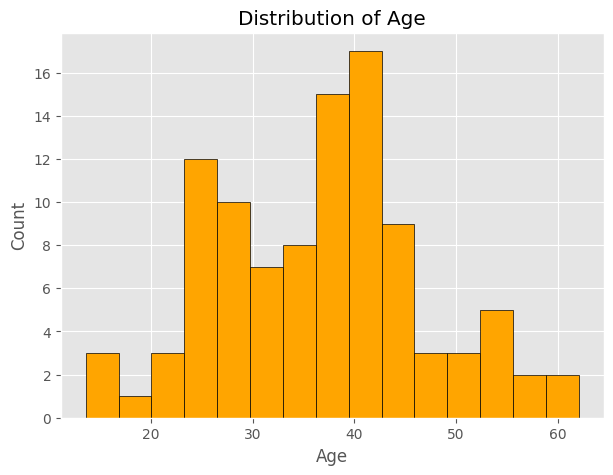

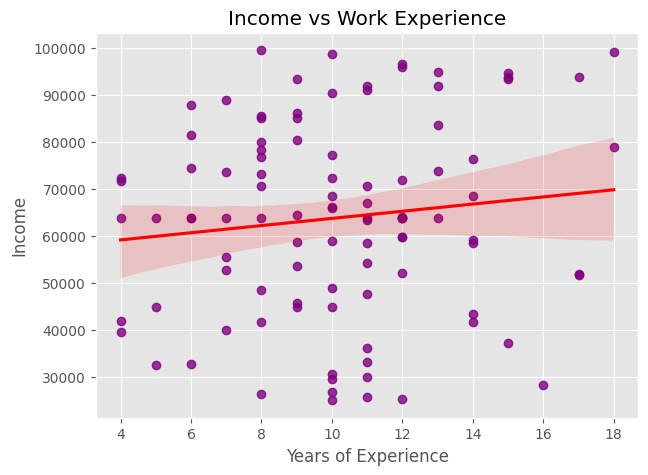

In [13]:
# Plot distribution of Age
plt.figure(figsize=(7, 5))
plt.hist(df_cleaned['Age'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot Income vs Work Experience with a different visualization approach
plt.figure(figsize=(7, 5))
sns.regplot(x='Work_Experience', y='Income', data=df_cleaned, scatter_kws={'color':'purple'}, line_kws={'color':'red'})
plt.title('Income vs Work Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.show()


## Conclusion
This notebook provides an alternative approach to EDA, using different data cleaning and visualization techniques. Feel free to adapt the analysis methods to your specific dataset and research needs.
